In [1]:
import itertools
import matplotlib
from operator import itemgetter
import sys
sys.path.append('../methods')
from settings import *
import helpers
import interacting_with_regulondb as ir

%matplotlib inline
config_dict = helpers.process_config("config")

# Output
figures_dir = config_dict["out_dir"]["figures"]
results_dir = config_dict["out_dir"]["results"]

# Data
rdb = config_dict["db"]["path"]
cnts_file = config_dict['out_dir']['counts']

/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/methods/helpers.py


In [2]:
crp = pd.DataFrame.from_records(ir.get_regulon(rdb, 'crp'), columns=["regulator", "name", "locus_tag", 'function', 'mod'])
crp.shape #571, 5

(571, 5)

In [3]:
crp.head()

,regulator,name,locus_tag,function,mod
0,crp,lsrF,b1517,activator,CRP-cAMP
1,crp,lsrA,b1513,activator,CRP-cAMP
2,crp,mcaS,ECK120002610,activator,CRP-cAMP
3,crp,idnO,b4266,activator,CRP-cAMP
4,crp,lacY,b0343,repressor,CRP-cAMP


In [4]:
crp = crp[crp.function == 'activator'].set_index('name')

In [5]:
crp_bnums = crp.locus_tag.values
len(crp_bnums) #425

425

In [6]:
def get_subset_genes(df, key, col_return,column_name="Function"):
    keep = []
    if not type(key) == str:
        return df[df[column_name].isin(key)][col_return]
    for i, x in zip(df.index, df[column_name]):
        if not type(x) == str:
            continue
        if key in x:
            keep.append(i)
    return df.loc[keep][col_return]

df = pd.read_csv(config_dict['out_dir']['de_edited_file'], index_col=0)
rprotein = get_subset_genes(df, "ribosomal subunit protein", df.columns).index
len(rprotein) # 48

48

In [15]:
#...
crp_path = "/Users/annasintsova/git_repos/HUTI-RNAseq/shared_data/crp_genes.csv"
ribo_path = "/Users/annasintsova/git_repos/HUTI-RNAseq/shared_data/ribo_genes.csv"
with open(crp_path, "w") as fo:
    for bnum in crp_bnums:
        fo.write(bnum + "\n")
with open(ribo_path, "w") as fo:
    for bnum in rprotein:
        fo.write(bnum + "\n")

In [7]:
cnts = pd.read_csv(cnts_file, index_col=0)
to_keep = [c for c in cnts.columns if 'count' in c]
cnts = cnts[to_keep]
core_cnts = cnts.sum() # counts dedicated to core genome expression
ribosome_counts = cnts.loc[rprotein]
ribosome_sum = ribosome_counts.sum()
crp_in_core = set(crp_bnums).intersection(set(cnts.index))
crp_counts = cnts.loc[crp_in_core]
crp_sum = crp_counts.sum()

In [8]:
totals =  pd.DataFrame({'Core': core_cnts,'R-protein':ribosome_sum, 'Catabolic genes': crp_sum})
totals["C%"] = round(totals["Catabolic genes"]/totals["Core"]*100,2)
totals["R%"] = round(totals["R-protein"]/totals["Core"]*100,2)
totals['Sample'] = [ur  if 'UR' in c else uti for c in totals.index]
totals


,Core,R-protein,Catabolic genes,C%,R%,Sample
HM01_UR_count,8339516.0,364511.0,2229966.0,26.74,4.37,URINE
HM01_UTI_count,2270040.0,605552.0,260645.0,11.48,26.68,PATIENT
HM03_UR_count,11344027.0,523235.0,2561484.0,22.58,4.61,URINE
HM03_UTI_count,4913506.0,1397637.0,643289.0,13.09,28.44,PATIENT
HM06_UR_count,11789016.0,883421.0,2478077.0,21.02,7.49,URINE
HM06_UTI_count,2606614.0,506208.0,303138.0,11.63,19.42,PATIENT
HM07_UR_count,10917809.0,480849.0,2156924.0,19.76,4.40,URINE
HM07_UTI_count,1136237.0,253247.0,132565.0,11.67,22.29,PATIENT
HM14_UR_count,11278572.0,512872.0,2786211.0,24.70,4.55,URINE
HM14_UTI_count,7774529.0,2139952.0,1071556.0,13.78,27.53,PATIENT


In [9]:
flag = pd.read_csv(config_dict['flagstat']['summary'], index_col=0)
flag
flag.index = [f.split("_trimmed")[0]+"_count" for f in flag.index]
mapped = flag.loc[totals.index]['mapped']
totals['mapped'] = mapped
totals['% core'] = round(totals["Core"]/totals['mapped']*100, 2)
#totals.to_csv(os.path.join(results_dir, "percent_allocated.csv"))

In [10]:
totals

,Core,R-protein,Catabolic genes,C%,R%,Sample,mapped,% core
HM01_UR_count,8339516.0,364511.0,2229966.0,26.74,4.37,URINE,16480326,50.60
HM01_UTI_count,2270040.0,605552.0,260645.0,11.48,26.68,PATIENT,3717040,61.07
HM03_UR_count,11344027.0,523235.0,2561484.0,22.58,4.61,URINE,20927541,54.21
HM03_UTI_count,4913506.0,1397637.0,643289.0,13.09,28.44,PATIENT,8059076,60.97
HM06_UR_count,11789016.0,883421.0,2478077.0,21.02,7.49,URINE,22847374,51.60
HM06_UTI_count,2606614.0,506208.0,303138.0,11.63,19.42,PATIENT,4709092,55.35
HM07_UR_count,10917809.0,480849.0,2156924.0,19.76,4.40,URINE,20980473,52.04
HM07_UTI_count,1136237.0,253247.0,132565.0,11.67,22.29,PATIENT,2097350,54.17
HM14_UR_count,11278572.0,512872.0,2786211.0,24.70,4.55,URINE,21533817,52.38
HM14_UTI_count,7774529.0,2139952.0,1071556.0,13.78,27.53,PATIENT,12968218,59.95


In [14]:
from Bio.KEGG import REST

paths = ["path:eco00010", "path:eco00020"]

def get_genes_for_pathway(pathway):
    genes = []
    pathway_file = REST.kegg_get(pathway).read()
    current_section = None
    for line in pathway_file.rstrip().split("\n"):
        section = line[:12].strip()  # section names are within 12 columns
        if not section == "":
            current_section = section

        if current_section == "GENE":
            gene_identifiers = line[12:].split("; ")[0]
            gene_id, gene_symbol = gene_identifiers.split()
            if not gene_symbol in genes:
                genes.append(gene_id)
    return genes


In [17]:
aa_biosynthesis = "eco00290,eco00300,eco00220,eco00400".split(",")


In [ ]:
aa_A_genes = []
for p in aa_biosynthesis:
    aa_A_genes+= get_genes_for_pathway(p)
    
def get_percentage(gene_list, cnts_df):
    counts = cnts_df.loc[[g for g in gene_list if g in cnts_df.index]]
    return counts.sum()/cnts_df.sum()*100

aa_A_sum = get_percentage(aa_A_genes, cnts)
aa_A_genes_counts = cnts.loc[[g for g in aa_A_genes if g in cnts.index]]
totals["A%"] = aa_A_sum

Text(0,0.5,'% Core Genome Reads')

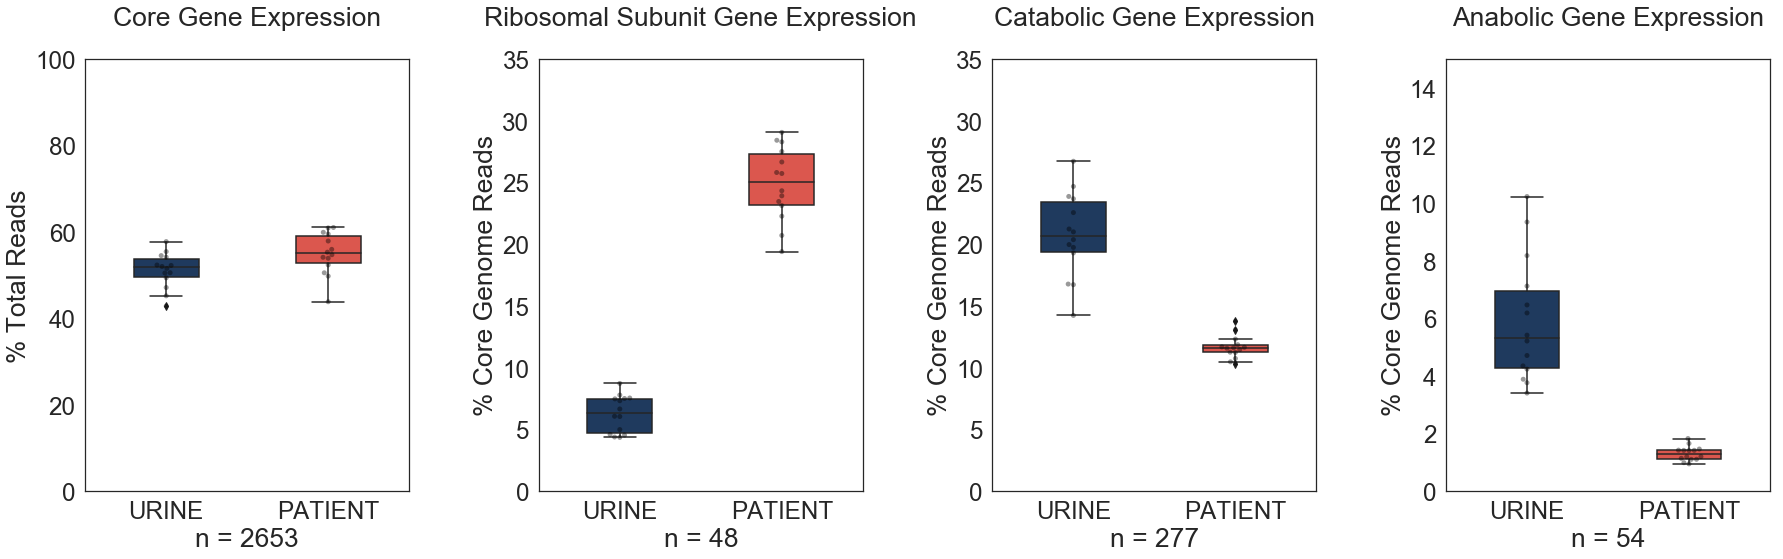

In [18]:
fig = plt.figure(figsize=(9,5))

sns.set(font_scale = 2.2)
sns.set_style("white")
# Core Gene Expression
ax1 = fig.add_axes([0.1, 0.5, 0.5, 1.2],
                    xticklabels=[], ylim=(0, 100))
#sns.violinplot(x = "Sample", y = "% core", palette=[col5, col1],data = totals,width=0.4)
sns.boxplot(x = "Sample", y = "% core", palette=[col5, col1],data = totals,width=0.4)
sns.swarmplot(x = "Sample", y = "% core", data = totals, color = 'black', alpha = 0.4)
ax1.set_title("Core Gene Expression\n")
ax1.set_xticklabels([ur, uti])
ax1.set_xlabel("n = {}".format(cnts.shape[0]))
ax1.set_ylabel("% Total Reads")

# Ribosome Subunits Gene Expression

ax2 = fig.add_axes([0.8, 0.5, 0.5, 1.2],
                    xticklabels=[], ylim=(0, 35))
#sns.violinplot(x = "Sample", y = "R%",palette=[col5, col1], data = totals, width=0.4)
sns.boxplot(x = "Sample", y = "R%",palette=[col5, col1], data = totals, width=0.4)
sns.swarmplot(x = "Sample", y = "R%", data =totals, color = 'black', alpha = 0.4)
ax2.set_title("Ribosomal Subunit Gene Expression\n")
ax2.set_xticklabels([ur, uti])
ax2.set_xlabel("n = {}".format(len(rprotein)))
ax2.set_ylabel("% Core Genome Reads")

# Catabolic Gene Expression

ax3 = fig.add_axes([1.5, 0.5, 0.5, 1.2],
                    xticklabels=[], ylim=(0, 35))
#sns.violinplot(x = "Sample", y = "C%", palette=[col5, col1], data = totals, width=0.4)
sns.boxplot(x = "Sample", y = "C%", palette=[col5, col1], data = totals, width=0.4)
sns.swarmplot(x = "Sample", y = "C%", data =totals, color = 'black', alpha = 0.4)
ax3.set_title("Catabolic Gene Expression\n")
ax3.set_xticklabels([ur, uti])
ax3.set_xlabel("n = {}".format(len(crp_in_core)))
ax3.set_ylabel("% Core Genome Reads")

ax4 = fig.add_axes([2.2, 0.5, 0.5, 1.2],
                    xticklabels=[], ylim=(0, 15))
sns.boxplot(x = "Sample", y = "A%", palette=[col5, col1], data = totals, width=0.4)
#sns.boxplot(x = "Sample", y = "C%", palette=[col5, col1], data = totals, width=0.4)
sns.swarmplot(x = "Sample", y = "A%", data =totals, color = 'black', alpha = 0.4)
ax4.set_title("Anabolic Gene Expression\n")
ax4.set_xticklabels([ur, uti])
ax4.set_xlabel("n = {}".format(aa_A_genes_counts.shape[0]))
ax4.set_ylabel("% Core Genome Reads")
#fig.savefig(os.path.join(figures_dir, "Figure_4.png"),bbox_inches='tight',dpi=150 )

# HM43 and mouse experiment

In [20]:
mouse_counts = pd.read_csv("/Users/annasintsova/git_repos/HUTI-RNAseq/shared_data/mouse_lb_raw_counts.csv", index_col=0)
ortho_table = pd.read_csv("/Users/annasintsova/git_repos/HUTI-RNAseq/shared_data/orthologs.csv",index_col=0)[['HM43']]
mcnts = ortho_table.merge(mouse_counts, how='left', left_on='HM43', right_index=True).drop('HM43', axis=1)

In [21]:
mcore_cnts = mcnts.sum() # counts dedicated to core genome expression
mribosome_counts = mcnts.loc[rprotein]
mribosome_sum = mribosome_counts.sum()
mcrp_counts = mcnts.loc[crp_in_core]
mcrp_sum = mcrp_counts.sum()

In [22]:
astats = pd.read_csv("/Users/annasintsova/git_repos/mouse_model/data/Alignment_Stats.csv", index_col=0)
astats.index = [i.split("_trimmed")[0] for i in astats.index]
astats

,Total,Mapped,% Mapped
HM43_LB_rep1,63966646,62813946,98.20
HM43_UR_rep2,44176952,43093840,97.55
HM43_mouse,44314537,3690174,8.33
HM43_LB_rep2,37833957,37090863,98.04
HM43_UR_rep1,43179946,42293006,97.95


In [23]:
mtotals =  pd.DataFrame({'Core': mcore_cnts,'R-protein':mribosome_sum, 'Catabolic genes': mcrp_sum})
mtotals["C%"] = round(mtotals["Catabolic genes"]/mtotals["Core"]*100,2)
mtotals["R%"] = round(mtotals["R-protein"]/mtotals["Core"]*100,2)
mtotals['Sample'] = [c.split("_")[1] for c in mtotals.index]
mtotals['%Core'] = mtotals["Core"]/astats['Mapped']*100
mtotals.at['HM43_UTI', '%Core'] =  56.0
mtotals

,Core,R-protein,Catabolic genes,C%,R%,Sample,%Core
HM43_LB_rep2,19510801,2552136,3857542,19.77,13.08,LB,52.602715
HM43_UR_rep1,17810139,707337,3586737,20.14,3.97,UR,42.111310
HM43_UTI,4557691,1091252,562077,12.33,23.94,UTI,56.000000
HM43_UR_rep2,15844775,388288,3551936,22.42,2.45,UR,36.768074
HM43_LB_rep1,33719081,4408563,6795490,20.15,13.07,LB,53.680883
HM43_mouse,2022208,429120,285538,14.12,21.22,mouse,54.799801


In [24]:
R_sorted = mtotals.sort_values('R%')

(0, 100)

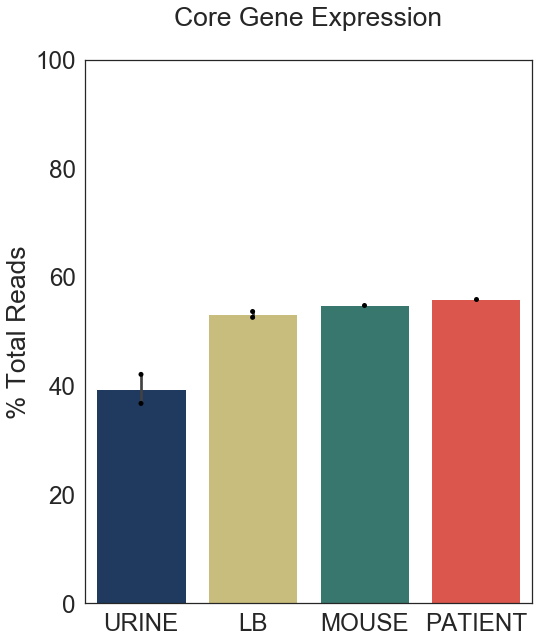

In [25]:
sns.set(font_scale = 2.2)
sns.set_style("white")
f = plt.figure(figsize=(8,10));
ax = sns.barplot(x="Sample", y="%Core", data=R_sorted, palette=[col5, col2, col4, col1]);
sns.swarmplot(x = "Sample", y = "%Core", data = R_sorted, color = 'black');
ax.set_xticklabels(["URINE", "LB", "MOUSE", "PATIENT"]);
ax.set_ylabel("% Total Reads");
ax.set_title("Core Gene Expression\n");
ax.set_xlabel("");
ax.set_ylim((0,100))

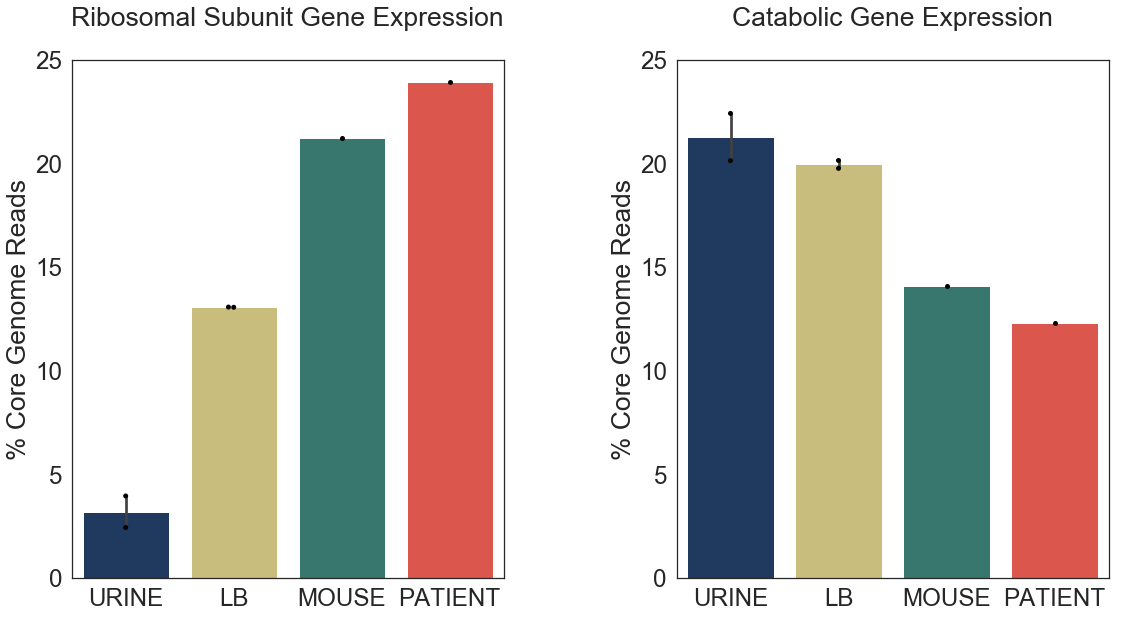

In [87]:
fig = plt.figure(figsize=(12,6))

sns.set(font_scale = 2.2)
sns.set_style("white")

ax1 = fig.add_axes([0.1, 0.5, 0.5, 1.2],
                    xticklabels=[], ylim=(0, 100))

sns.barplot(x="Sample", y="R%", data=R_sorted, palette=[col5, col2, col4, col1]);
sns.swarmplot(x = "Sample", y = "R%", data = R_sorted, color = 'black');
ax1.set_xticklabels(["URINE", "LB", "MOUSE", "PATIENT"]);
ax1.set_ylabel("% Core Genome Reads");
ax1.set_title("Ribosomal Subunit Gene Expression\n");
ax1.set_xlabel("");
ax1.set_ylim((0,25))

ax2 = fig.add_axes([0.8, 0.5, 0.5, 1.2],
                    xticklabels=[], ylim=(0, 35))

sns.barplot(x="Sample", y="C%", data=R_sorted, palette=[col5, col2, col4, col1]);
sns.swarmplot(x = "Sample", y = "C%", data = R_sorted, color = 'black');
ax2.set_xticklabels(["URINE", "LB", "MOUSE", "PATIENT"]);
ax2.set_ylabel("% Core Genome Reads");
ax2.set_title("Catabolic Gene Expression\n");
ax2.set_xlabel("");
ax2.set_ylim((0,25));

fig.savefig(os.path.join(figures_dir, "Figure_5N.png"),bbox_inches='tight',dpi=150 )

# Doubling time estimations

In [52]:
import datetime as dt

In [28]:
data = pd.read_csv("/Users/annasintsova/git_repos/HUTI-RNAseq/shared_data/HM43_growth.csv").dropna()

In [74]:
data["LB_av"] = data[[c for c in data.columns if 'LB' in c]].mean(axis=1)
data['UR_av'] = data[[c for c in data.columns if 'Urine' in c]].mean(axis=1)
data['minutes'] = pd.to_timedelta(data.time).dt.total_seconds()/60

In [75]:
data.tail()

,time,LB1,LB2,LB3,LB4,LB5,LB6,LB7,LB8,Urine1,Urine2,Urine3,Urine4,Urine5,Urine6,Urine7,Urine8,LB_av,UR_av,minutes
90,22:48:19,1.455000,1.454667,1.477333,1.470000,1.388333,1.401833,1.400333,1.432000,0.242000,0.245333,0.240333,0.309667,0.248667,0.2550,0.267000,0.241667,1.434937,0.256208,1368.316667
91,23:03:20,1.452667,1.455000,1.476333,1.469333,1.389667,1.399167,1.400667,1.436333,0.240667,0.242000,0.239667,0.309333,0.249667,0.2560,0.266333,0.243000,1.434896,0.255833,1383.333333
92,23:18:20,1.451333,1.452667,1.479667,1.469333,1.388333,1.399333,1.400667,1.435667,0.240000,0.240667,0.239000,0.308667,0.249000,0.2550,0.266000,0.242000,1.434625,0.255042,1398.333333
93,23:33:19,1.453333,1.451333,1.479333,1.469333,1.387667,1.399333,1.397667,1.435333,0.238333,0.240000,0.240333,0.308000,0.248667,0.2545,0.265000,0.241333,1.434167,0.254521,1413.316667
94,23:48:19,1.452667,1.453333,1.481333,1.465667,1.387000,1.399333,1.396333,1.433667,0.237333,0.238333,0.241000,0.307000,0.250000,0.2550,0.265667,0.242333,1.433667,0.254583,1428.316667


In [76]:
dt_df = data[['minutes', 'LB_av', 'UR_av']]
dt_df.tail()

,minutes,LB_av,UR_av
90,1368.316667,1.434937,0.256208
91,1383.333333,1.434896,0.255833
92,1398.333333,1.434625,0.255042
93,1413.316667,1.434167,0.254521
94,1428.316667,1.433667,0.254583


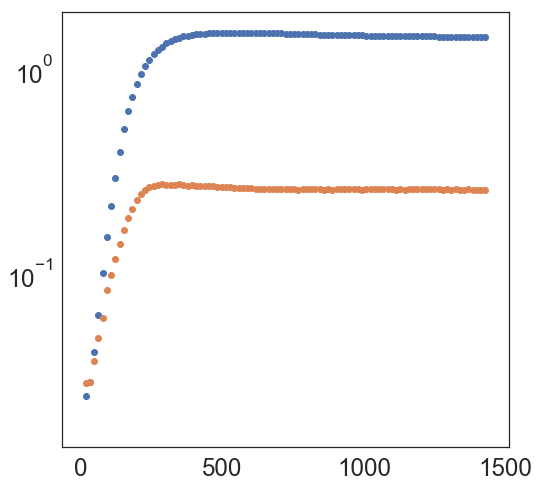

In [77]:
plt.figure(figsize=(8,8))
plt.scatter(dt_df.minutes, dt_df.LB_av,  )
plt.scatter(dt_df.minutes, dt_df.UR_av,  )
plt.yscale("log")

In [80]:
df = dt_df[(dt_df.minutes < 190) &(dt_df.minutes > 30) ].reset_index()
df

,index,minutes,LB_av,UR_av
0,1,33.333333,0.029083,0.029271
1,2,48.333333,0.041021,0.036812
2,3,63.316667,0.062500,0.048042
3,4,78.316667,0.099750,0.060188
4,5,93.316667,0.150312,0.082083
5,6,108.316667,0.211771,0.097896
6,7,123.316667,0.290583,0.116687
7,8,138.316667,0.389771,0.138208
8,9,153.333333,0.507042,0.162187
9,10,168.316667,0.617937,0.186229


In [79]:
def calc_dt(c1, c2, duration):
    return (duration*np.log(2))/(np.log(c2) - np.log(c1))

In [81]:
import itertools
LB_dts= []
for points in itertools.combinations(df.index, 2):
    t1 = min(points)
    t2 = max(points)
    c1 = df.iloc[t1]['LB_av']
    c2 = df.iloc[t2]['LB_av']
    duration = df.iloc[t2]['minutes'] - df.iloc[t1]['minutes']
    LB_dts.append(calc_dt(c1, c2, duration))
    
print("Mean")
print(pd.Series(LB_dts).mean())
print('Median')
print(pd.Series(LB_dts).median())


Mean
33.022816004
Median
30.6624746767


Mean
54.9181596077
Median
52.4547056258


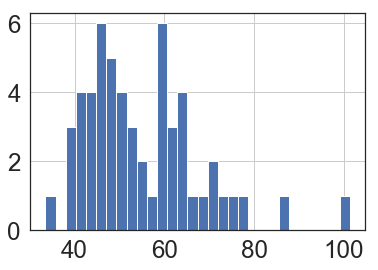

In [82]:
UR_dts= []
for points in itertools.combinations(df.index, 2):
    t1 = min(points)
    t2 = max(points)
    c1 = df.iloc[t1]['UR_av']
    c2 = df.iloc[t2]['UR_av']
    duration = df.iloc[t2]['minutes'] - df.iloc[t1]['minutes']
    UR_dts.append(calc_dt(c1, c2, duration))
    
pd.Series(UR_dts).hist(bins = 30)
print('Mean')
print(pd.Series(UR_dts).mean())
print('Median')
print(pd.Series(UR_dts).median())

In [200]:
pd.Series(LB_dts).describe()

count    55.000000
mean     33.022816
std       8.410124
min      22.240079
25%      27.132436
50%      30.662475
75%      36.144137
max      61.999847
dtype: float64

In [199]:
pd.Series(UR_dts).describe()

count     55.000000
mean      54.918160
std       12.914083
min       33.510495
25%       45.228063
50%       52.454706
75%       61.616941
max      101.334217
dtype: float64